In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove.model import *

from sklearn.model_selection import KFold

In [2]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed" in f and "passage" not in f]
files

['EXP0019_MS001_processed.csv',
 'EXP0019_MS014_processed.csv',
 'EXP0019_MS008_processed.csv',
 'EXP0019_DSM27147_processed.csv']

# fit gLV models

In [3]:
def predict_df(df, species):
    
    # save measured and predicted values
    exp_names = []
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # predict 
        Y_p, Y_std = model.predict(Y_m, t_span)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)
        
        ### prediction results for species that were present ###
        inds_present = Y_m[0] > 0 
        exp_names.append([exp]*sum(inds_present)*(Y_m.shape[0]-1))
        pred_species.append(np.tile(np.vstack(species)[inds_present], Y_m.shape[0]-1).T.ravel())
        true.append(Y_m[1:,inds_present].ravel())
        pred.append(Y_p[1:,inds_present].ravel())
        stdv.append(Y_std[1:,inds_present].ravel())
                
    # concatenate list
    exp_names = np.concatenate(exp_names)
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return exp_names, pred_species, true, pred, stdv

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Total samples: 32, Initial regularization: 1.00e-03
Loss: 8.276, Residuals: -0.277
Loss: 5.190, Residuals: 0.210
Loss: 3.890, Residuals: 0.128
Loss: 3.216, Residuals: 0.067
Loss: 3.114, Residuals: 0.045
Loss: 2.923, Residuals: 0.031
Loss: 2.606, Residuals: 0.011
Loss: 2.232, Residuals: -0.030
Loss: 2.204, Residuals: 0.027
Loss: 2.151, Residuals: 0.022
Loss: 2.059, Residuals: 0.018
Loss: 2.007, Residuals: 0.021
Loss: 1.929, Residuals: 0.013
Loss: 1.925, Residuals: 0.035
Loss: 1.888, Residuals: 0.024
Loss: 1.880, Residuals: 0.032
Loss: 1.867, Residuals: 0.027
Loss: 1.866, Residuals: 0.029
Loss: 1.860, Residuals: 0.026
Loss: 1.850, Residuals: 0.020
Loss: 1.850, Residuals: 0.022
Loss: 1.840, Residuals: 0.016
Loss: 1.826, Residuals: 0.005
Loss: 1.825, Residuals: 0.012
Loss: 1.825, Residuals: 0.012
Optimization terminated successfully.
Evidence -35.011
Updating hyper-parameters...
Total samples: 32, Updated regularization: 8.34e-01
Loss: 20.299, Residuals: 0.075
Loss: 20.150, Residuals: 0.08

Loss: 130.453, Residuals: -0.004
Loss: 130.451, Residuals: -0.004
Optimization terminated successfully.
Evidence 426.835
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.33e+00
Loss: 131.042, Residuals: -0.005
Loss: 130.976, Residuals: -0.005
Loss: 130.882, Residuals: -0.006
Loss: 130.882, Residuals: -0.006
Optimization terminated successfully.
Evidence 427.613
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.21e+00
Loss: 131.250, Residuals: -0.007
Loss: 131.202, Residuals: -0.007
Loss: 131.191, Residuals: -0.008
Loss: 131.186, Residuals: -0.007
Loss: 131.153, Residuals: -0.008
Loss: 131.153, Residuals: -0.008
Optimization terminated successfully.
Evidence 428.118
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.12e+00
Loss: 131.412, Residuals: -0.008
Loss: 131.386, Residuals: -0.009
Loss: 131.380, Residuals: -0.009
Loss: 131.377, Residuals: -0.009
Loss: 131.372, Residuals: -0.009
Loss: 131.362, Residuals: -0.00

Loss: 99.030, Residuals: -0.002
Loss: 99.016, Residuals: -0.001
Optimization terminated successfully.
Evidence 424.005
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.67e+00
Loss: 121.287, Residuals: -0.001
Loss: 121.228, Residuals: -0.001
Optimization terminated successfully.
Evidence 441.492
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.74e+00
Loss: 128.485, Residuals: -0.006
Loss: 128.315, Residuals: -0.009
Optimization terminated successfully.
Evidence 451.211
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.72e+00
Loss: 132.815, Residuals: -0.006
Loss: 131.662, Residuals: -0.006
Loss: 131.655, Residuals: -0.007
Optimization terminated successfully.
Evidence 457.582
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.72e+00
Loss: 133.886, Residuals: -0.004
Loss: 133.808, Residuals: -0.006
Optimization terminated successfully.
Evidence 460.706
Updating hyper-parameters...
Total sampl

Loss: 1.682, Residuals: -0.028
Loss: 1.682, Residuals: -0.028
Loss: 1.682, Residuals: -0.028
Loss: 1.682, Residuals: -0.028
Loss: 1.682, Residuals: -0.028
Loss: 1.681, Residuals: -0.028
Loss: 1.680, Residuals: -0.028
Loss: 1.659, Residuals: -0.015
Loss: 1.636, Residuals: -0.028
Loss: 1.559, Residuals: -0.017
Loss: 1.534, Residuals: -0.018
Loss: 1.526, Residuals: -0.017
Loss: 1.514, Residuals: -0.015
Loss: 1.496, Residuals: -0.015
Loss: 1.494, Residuals: -0.013
Loss: 1.480, Residuals: -0.014
Loss: 1.480, Residuals: -0.012
Loss: 1.472, Residuals: -0.014
Loss: 1.470, Residuals: -0.012
Loss: 1.467, Residuals: -0.012
Loss: 1.459, Residuals: -0.012
Loss: 1.459, Residuals: -0.011
Loss: 1.447, Residuals: -0.012
Loss: 1.445, Residuals: -0.010
Loss: 1.432, Residuals: -0.010
Loss: 1.432, Residuals: -0.009
Loss: 1.426, Residuals: -0.009
Loss: 1.421, Residuals: -0.008
Loss: 1.420, Residuals: -0.007
Loss: 1.417, Residuals: -0.007
Loss: 1.411, Residuals: -0.007
Loss: 1.411, Residuals: -0.005
Loss: 1.

Loss: 124.800, Residuals: 0.012
Optimization terminated successfully.
Evidence 520.467
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.71e+00
Loss: 135.851, Residuals: 0.009
Loss: 135.658, Residuals: 0.010
Loss: 135.472, Residuals: 0.007
Loss: 135.436, Residuals: 0.007
Loss: 135.382, Residuals: 0.007
Loss: 135.379, Residuals: 0.007
Optimization terminated successfully.
Evidence 526.256
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.66e+00
Loss: 139.372, Residuals: 0.006
Loss: 139.281, Residuals: 0.006
Loss: 139.162, Residuals: 0.005
Loss: 139.155, Residuals: 0.005
Optimization terminated successfully.
Evidence 528.772
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.62e+00
Loss: 140.765, Residuals: 0.005
Loss: 140.674, Residuals: 0.004
Loss: 140.573, Residuals: 0.002
Loss: 140.569, Residuals: 0.003
Optimization terminated successfully.
Evidence 530.173
Updating hyper-parameters...
Total samples: 36, Updated r

Loss: 143.857, Residuals: 0.012
Loss: 143.792, Residuals: 0.012
Loss: 143.749, Residuals: 0.011
Loss: 143.748, Residuals: 0.011
Optimization terminated successfully.
Evidence 500.077
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.43e+00
Loss: 144.047, Residuals: 0.011
Loss: 144.012, Residuals: 0.011
Loss: 143.985, Residuals: 0.011
Loss: 143.984, Residuals: 0.011
Optimization terminated successfully.
Evidence 500.666
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.39e+00
Loss: 144.201, Residuals: 0.011
Loss: 144.184, Residuals: 0.011
Loss: 144.166, Residuals: 0.010
Loss: 144.166, Residuals: 0.010
Optimization terminated successfully.
Evidence 501.036
Pass count  1
Total samples: 35, Initial regularization: 1.00e-03
Loss: 8.725, Residuals: -0.349
Loss: 5.267, Residuals: 0.143
Loss: 3.702, Residuals: -0.038
Loss: 3.256, Residuals: -0.096
Loss: 2.971, Residuals: 0.044
Loss: 2.529, Residuals: 0.021
Loss: 2.207, Residuals: -0.005
Loss: 2.1

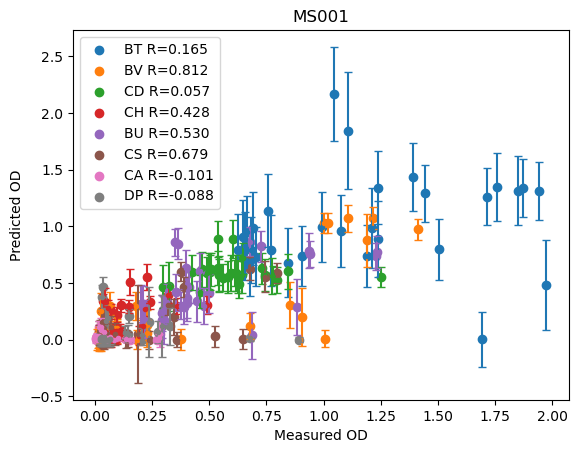

Total samples: 25, Initial regularization: 1.00e-03
Loss: 7.051, Residuals: -0.362
Loss: 4.054, Residuals: 0.256
Loss: 2.573, Residuals: 0.109
Loss: 1.927, Residuals: 0.053
Loss: 1.430, Residuals: -0.054
Loss: 1.331, Residuals: -0.044
Loss: 1.214, Residuals: 0.038
Loss: 1.022, Residuals: 0.015
Loss: 0.929, Residuals: 0.015
Loss: 0.791, Residuals: -0.001
Loss: 0.782, Residuals: 0.033
Loss: 0.713, Residuals: 0.013
Loss: 0.640, Residuals: -0.018
Loss: 0.637, Residuals: -0.020
Loss: 0.633, Residuals: -0.025
Loss: 0.625, Residuals: -0.027
Loss: 0.621, Residuals: -0.022
Loss: 0.620, Residuals: -0.019
Loss: 0.619, Residuals: -0.018
Loss: 0.612, Residuals: -0.023
Loss: 0.604, Residuals: -0.030
Loss: 0.604, Residuals: -0.032
Loss: 0.604, Residuals: -0.031
Loss: 0.603, Residuals: -0.031
Loss: 0.602, Residuals: -0.033
Loss: 0.602, Residuals: -0.032
Loss: 0.601, Residuals: -0.033
Loss: 0.600, Residuals: -0.035
Loss: 0.600, Residuals: -0.036
Optimization terminated successfully.
Evidence -42.199
Up

Loss: 90.637, Residuals: 0.017
Loss: 90.397, Residuals: 0.013
Loss: 90.148, Residuals: 0.014
Loss: 90.135, Residuals: 0.016
Optimization terminated successfully.
Evidence 336.766
Updating hyper-parameters...
Total samples: 26, Updated regularization: 2.33e+00
Loss: 97.128, Residuals: 0.012
Loss: 96.852, Residuals: 0.010
Loss: 96.816, Residuals: 0.008
Loss: 96.807, Residuals: 0.010
Optimization terminated successfully.
Evidence 341.127
Updating hyper-parameters...
Total samples: 26, Updated regularization: 2.19e+00
Loss: 99.969, Residuals: 0.008
Loss: 99.760, Residuals: 0.006
Loss: 99.755, Residuals: 0.007
Optimization terminated successfully.
Evidence 343.084
Updating hyper-parameters...
Total samples: 26, Updated regularization: 2.09e+00
Loss: 101.346, Residuals: 0.008
Loss: 101.228, Residuals: 0.007
Loss: 101.103, Residuals: 0.004
Loss: 101.099, Residuals: 0.003
Optimization terminated successfully.
Evidence 344.658
Updating hyper-parameters...
Total samples: 26, Updated regularizati

Loss: 0.673, Residuals: -0.016
Loss: 0.668, Residuals: -0.019
Loss: 0.668, Residuals: -0.018
Loss: 0.664, Residuals: -0.020
Loss: 0.659, Residuals: -0.025
Loss: 0.659, Residuals: -0.025
Loss: 0.658, Residuals: -0.024
Loss: 0.657, Residuals: -0.025
Loss: 0.655, Residuals: -0.028
Loss: 0.655, Residuals: -0.027
Loss: 0.655, Residuals: -0.026
Loss: 0.654, Residuals: -0.027
Loss: 0.653, Residuals: -0.029
Loss: 0.653, Residuals: -0.029
Loss: 0.653, Residuals: -0.029
Loss: 0.653, Residuals: -0.029
Loss: 0.652, Residuals: -0.030
Loss: 0.652, Residuals: -0.030
Loss: 0.652, Residuals: -0.030
Loss: 0.652, Residuals: -0.030
Loss: 0.652, Residuals: -0.030
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.652, Residuals: -0.031
Loss: 0.

Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.040
Loss: 0.597, Residuals: -0.041
Loss: 0.597, Residuals: -0.041
Evidence -52.714
Updating hyper-parameters...
Total samples: 28, Updated regularization: 7.37e-01
Loss: 15.084, Residuals: -0.011
Loss: 13.227, Residuals: 0.043
Lo

Loss: 32.835, Residuals: 0.043
Loss: 32.554, Residuals: 0.038
Loss: 32.516, Residuals: 0.038
Loss: 32.483, Residuals: 0.038
Loss: 32.474, Residuals: 0.037
Loss: 32.460, Residuals: 0.038
Loss: 32.437, Residuals: 0.037
Loss: 32.434, Residuals: 0.038
Loss: 32.431, Residuals: 0.038
Optimization terminated successfully.
Evidence 289.136
Updating hyper-parameters...
Total samples: 29, Updated regularization: 2.35e+00
Loss: 63.984, Residuals: 0.030
Loss: 63.567, Residuals: 0.028
Loss: 63.285, Residuals: 0.022
Loss: 63.258, Residuals: 0.022
Loss: 63.220, Residuals: 0.023
Loss: 63.176, Residuals: 0.022
Loss: 63.174, Residuals: 0.023
Optimization terminated successfully.
Evidence 356.294
Updating hyper-parameters...
Total samples: 29, Updated regularization: 2.72e+00
Loss: 89.704, Residuals: 0.029
Optimization terminated successfully.
Evidence 380.511
Updating hyper-parameters...
Total samples: 29, Updated regularization: 3.06e+00
Loss: 103.841, Residuals: 0.016
Loss: 103.216, Residuals: 0.007
L

Loss: 106.881, Residuals: 0.009
Optimization terminated successfully.
Evidence 429.562
Updating hyper-parameters...
Total samples: 29, Updated regularization: 1.95e+00
Loss: 110.475, Residuals: 0.010
Loss: 110.460, Residuals: 0.009
Optimization terminated successfully.
Evidence 431.933
Updating hyper-parameters...
Total samples: 29, Updated regularization: 1.97e+00
Loss: 112.367, Residuals: 0.010
Loss: 112.238, Residuals: 0.010
Loss: 112.201, Residuals: 0.009
Loss: 112.141, Residuals: 0.010
Loss: 112.097, Residuals: 0.009
Loss: 112.096, Residuals: 0.010
Optimization terminated successfully.
Evidence 433.997
Updating hyper-parameters...
Total samples: 29, Updated regularization: 1.81e+00
Loss: 112.955, Residuals: 0.010
Loss: 112.923, Residuals: 0.009
Loss: 112.915, Residuals: 0.010
Optimization terminated successfully.
Evidence 434.910
Updating hyper-parameters...
Total samples: 29, Updated regularization: 1.80e+00
Loss: 113.548, Residuals: 0.011
Loss: 113.524, Residuals: 0.010
Loss: 11

Loss: 0.517, Residuals: -0.032
Loss: 0.516, Residuals: -0.032
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Loss: 0.516, Residuals: -0.031
Evidence -49.521
Updating hyper-parameters...
Total samples: 30, Updated regularization: 6.13e-01
Loss: 15.889, Residuals: 0.009
Loss: 14.137, Residuals: 0.087
Loss: 13.997, Residuals: 0.039
Los

Evidence 375.707
Updating hyper-parameters...
Total samples: 28, Updated regularization: 2.06e+00
Loss: 109.685, Residuals: 0.001
Loss: 109.625, Residuals: -0.001
Loss: 109.621, Residuals: -0.001
Optimization terminated successfully.
Evidence 376.522
Updating hyper-parameters...
Total samples: 28, Updated regularization: 2.04e+00
Loss: 110.102, Residuals: 0.000
Loss: 110.055, Residuals: 0.000
Loss: 110.030, Residuals: -0.000
Loss: 110.026, Residuals: -0.000
Loss: 110.024, Residuals: 0.000
Loss: 110.023, Residuals: -0.000
Optimization terminated successfully.
Evidence 377.240
Updating hyper-parameters...
Total samples: 28, Updated regularization: 2.03e+00
Loss: 110.320, Residuals: 0.001
Optimization terminated successfully.
Evidence 377.469
Pass count  1


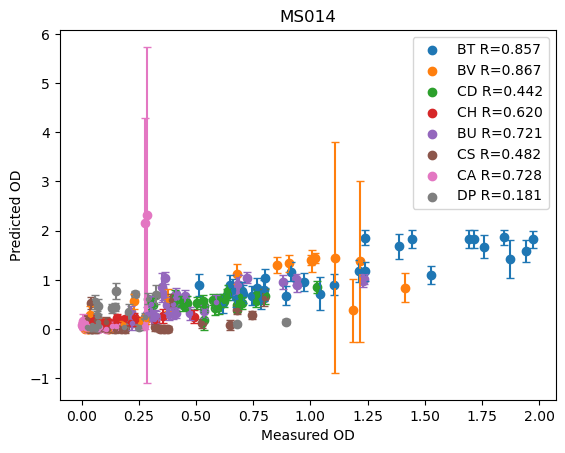

Total samples: 32, Initial regularization: 1.00e-03
Loss: 8.377, Residuals: -0.276
Loss: 5.190, Residuals: 0.210
Loss: 3.961, Residuals: 0.137
Loss: 3.270, Residuals: 0.071
Loss: 3.155, Residuals: 0.043
Loss: 2.939, Residuals: 0.027
Loss: 2.586, Residuals: 0.004
Loss: 2.295, Residuals: -0.027
Loss: 2.126, Residuals: 0.007
Loss: 2.065, Residuals: 0.023
Loss: 1.968, Residuals: 0.007
Loss: 1.962, Residuals: 0.027
Loss: 1.910, Residuals: 0.014
Loss: 1.855, Residuals: -0.001
Loss: 1.855, Residuals: -0.002
Loss: 1.853, Residuals: -0.000
Loss: 1.852, Residuals: -0.000
Loss: 1.849, Residuals: 0.000
Loss: 1.845, Residuals: 0.003
Loss: 1.842, Residuals: 0.011
Loss: 1.837, Residuals: 0.008
Loss: 1.834, Residuals: 0.012
Loss: 1.829, Residuals: 0.011
Loss: 1.821, Residuals: 0.007
Loss: 1.820, Residuals: 0.013
Loss: 1.820, Residuals: 0.013
Optimization terminated successfully.
Evidence -34.415
Updating hyper-parameters...
Total samples: 32, Updated regularization: 8.04e-01
Loss: 20.922, Residuals: 0

Total samples: 33, Updated regularization: 1.54e+00
Loss: 130.076, Residuals: -0.001
Loss: 130.037, Residuals: -0.001
Loss: 129.970, Residuals: -0.001
Loss: 129.898, Residuals: -0.002
Loss: 129.894, Residuals: -0.001
Optimization terminated successfully.
Evidence 427.592
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.42e+00
Loss: 130.671, Residuals: -0.002
Loss: 130.643, Residuals: -0.002
Loss: 130.597, Residuals: -0.003
Loss: 130.594, Residuals: -0.003
Optimization terminated successfully.
Evidence 428.222
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.38e+00
Loss: 131.065, Residuals: -0.003
Loss: 131.018, Residuals: -0.004
Loss: 131.011, Residuals: -0.004
Loss: 130.997, Residuals: -0.005
Loss: 130.975, Residuals: -0.005
Loss: 130.974, Residuals: -0.005
Optimization terminated successfully.
Evidence 428.726
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.31e+00
Loss: 131.270, Residuals: -0.006
Loss: 131.23

Loss: 131.779, Residuals: 0.002
Loss: 131.775, Residuals: 0.001
Optimization terminated successfully.
Evidence 460.859
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.64e+00
Loss: 134.792, Residuals: -0.000
Loss: 134.300, Residuals: 0.002
Loss: 134.269, Residuals: -0.000
Loss: 134.035, Residuals: -0.000
Loss: 133.994, Residuals: 0.001
Loss: 133.991, Residuals: 0.001
Optimization terminated successfully.
Evidence 463.740
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.61e+00
Loss: 135.718, Residuals: 0.002
Loss: 135.507, Residuals: 0.002
Loss: 135.480, Residuals: 0.000
Loss: 135.430, Residuals: 0.000
Loss: 135.344, Residuals: 0.000
Loss: 135.344, Residuals: 0.000
Optimization terminated successfully.
Evidence 465.424
Updating hyper-parameters...
Total samples: 35, Updated regularization: 1.52e+00
Loss: 136.436, Residuals: 0.002
Loss: 136.353, Residuals: 0.002
Loss: 136.286, Residuals: 0.002
Loss: 136.274, Residuals: 0.001
Loss: 136.249

Loss: 20.256, Residuals: 0.014
Loss: 20.253, Residuals: 0.014
Loss: 20.253, Residuals: 0.014
Optimization terminated successfully.
Evidence 261.627
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.24e+00
Loss: 60.297, Residuals: 0.012
Loss: 59.901, Residuals: 0.010
Loss: 59.831, Residuals: 0.016
Loss: 59.735, Residuals: 0.015
Loss: 59.673, Residuals: 0.016
Loss: 59.663, Residuals: 0.015
Loss: 59.659, Residuals: 0.016
Loss: 59.657, Residuals: 0.016
Loss: 59.654, Residuals: 0.016
Loss: 59.650, Residuals: 0.016
Loss: 59.650, Residuals: 0.016
Optimization terminated successfully.
Evidence 403.073
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.81e+00
Loss: 103.351, Residuals: 0.008
Loss: 102.979, Residuals: 0.006
Loss: 102.854, Residuals: 0.007
Loss: 102.793, Residuals: 0.009
Loss: 102.685, Residuals: 0.009
Loss: 102.548, Residuals: 0.009
Loss: 102.543, Residuals: 0.009
Optimization terminated successfully.
Evidence 459.571
Updating hyper-

Loss: 141.144, Residuals: 0.006
Loss: 141.119, Residuals: 0.004
Loss: 141.112, Residuals: 0.006
Optimization terminated successfully.
Evidence 530.165
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.43e+00
Loss: 141.456, Residuals: 0.006
Optimization terminated successfully.
Evidence 530.391
Pass count  1
Total samples: 36, Initial regularization: 1.00e-03
Loss: 8.887, Residuals: -0.329
Loss: 5.320, Residuals: 0.181
Loss: 4.793, Residuals: 0.152
Loss: 3.827, Residuals: 0.102
Loss: 3.257, Residuals: 0.079
Loss: 2.534, Residuals: 0.023
Loss: 2.257, Residuals: 0.002
Loss: 2.045, Residuals: 0.012
Loss: 2.021, Residuals: -0.000
Loss: 1.993, Residuals: 0.016
Loss: 1.949, Residuals: 0.010
Loss: 1.879, Residuals: -0.002
Loss: 1.873, Residuals: 0.009
Loss: 1.828, Residuals: -0.005
Loss: 1.765, Residuals: -0.015
Loss: 1.764, Residuals: -0.013
Loss: 1.762, Residuals: -0.011
Loss: 1.759, Residuals: -0.008
Loss: 1.752, Residuals: -0.009
Loss: 1.748, Residuals: -0.002
Loss:

Loss: 142.415, Residuals: 0.022
Loss: 142.409, Residuals: 0.022
Optimization terminated successfully.
Evidence 496.557
Updating hyper-parameters...
Total samples: 36, Updated regularization: 8.85e-01
Loss: 143.343, Residuals: 0.023
Loss: 143.248, Residuals: 0.022
Loss: 143.076, Residuals: 0.021
Loss: 143.075, Residuals: 0.021
Optimization terminated successfully.
Evidence 497.374
Updating hyper-parameters...
Total samples: 36, Updated regularization: 8.26e-01
Loss: 143.564, Residuals: 0.022
Loss: 143.541, Residuals: 0.021
Loss: 143.347, Residuals: 0.021
Loss: 143.346, Residuals: 0.021
Optimization terminated successfully.
Evidence 497.970
Updating hyper-parameters...
Total samples: 36, Updated regularization: 7.59e-01
Loss: 143.764, Residuals: 0.021
Optimization terminated successfully.
Evidence 498.250
Pass count  1
Total samples: 35, Initial regularization: 1.00e-03
Loss: 8.884, Residuals: -0.350
Loss: 5.300, Residuals: 0.139
Loss: 4.856, Residuals: 0.127
Loss: 4.027, Residuals: 0.09

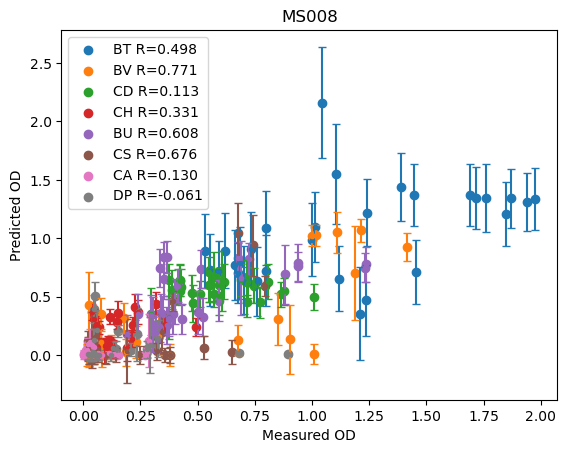

Total samples: 32, Initial regularization: 1.00e-03
Loss: 7.660, Residuals: -0.316
Loss: 4.901, Residuals: 0.218
Loss: 3.916, Residuals: 0.146
Loss: 3.401, Residuals: 0.101
Loss: 3.108, Residuals: -0.003
Loss: 3.023, Residuals: 0.015
Loss: 2.897, Residuals: 0.019
Loss: 2.687, Residuals: 0.005
Loss: 2.443, Residuals: -0.010
Loss: 2.309, Residuals: 0.013
Loss: 2.297, Residuals: 0.025
Loss: 2.276, Residuals: 0.024
Loss: 2.236, Residuals: 0.019
Loss: 2.209, Residuals: 0.055
Loss: 2.162, Residuals: 0.041
Loss: 2.160, Residuals: 0.046
Loss: 2.137, Residuals: 0.041
Loss: 2.098, Residuals: 0.030
Loss: 2.084, Residuals: 0.037
Loss: 2.059, Residuals: 0.030
Loss: 2.058, Residuals: 0.033
Loss: 2.048, Residuals: 0.029
Loss: 2.030, Residuals: 0.022
Loss: 2.016, Residuals: 0.020
Loss: 2.012, Residuals: 0.026
Loss: 2.006, Residuals: 0.023
Loss: 1.994, Residuals: 0.016
Loss: 1.977, Residuals: 0.007
Loss: 1.974, Residuals: 0.017
Loss: 1.974, Residuals: 0.017
Optimization terminated successfully.
Evidenc

Loss: 128.311, Residuals: 0.011
Loss: 128.131, Residuals: 0.010
Loss: 128.123, Residuals: 0.010
Optimization terminated successfully.
Evidence 420.575
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.41e+00
Loss: 129.692, Residuals: 0.008
Loss: 129.519, Residuals: 0.008
Loss: 129.514, Residuals: 0.010
Optimization terminated successfully.
Evidence 421.637
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.35e+00
Loss: 130.259, Residuals: 0.008
Loss: 130.192, Residuals: 0.008
Loss: 130.083, Residuals: 0.007
Loss: 130.079, Residuals: 0.008
Optimization terminated successfully.
Evidence 422.515
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.29e+00
Loss: 130.428, Residuals: 0.006
Loss: 130.424, Residuals: 0.006
Optimization terminated successfully.
Evidence 423.277
Updating hyper-parameters...
Total samples: 33, Updated regularization: 1.20e+00
Loss: 130.729, Residuals: 0.006
Optimization terminated successfully.
Ev

Total samples: 35, Updated regularization: 6.61e-01
Loss: 136.234, Residuals: 0.008
Optimization terminated successfully.
Evidence 421.496
Updating hyper-parameters...
Total samples: 35, Updated regularization: 6.64e-01
Loss: 137.193, Residuals: -0.006
Loss: 134.784, Residuals: -0.000
Loss: 134.562, Residuals: -0.002
Optimization terminated successfully.
Evidence 424.699
Updating hyper-parameters...
Total samples: 35, Updated regularization: 6.73e-01
Loss: 137.224, Residuals: 0.000
Optimization terminated successfully.
Evidence 425.383
Updating hyper-parameters...
Total samples: 35, Updated regularization: 6.75e-01
Loss: 135.487, Residuals: 0.005
Loss: 135.107, Residuals: 0.004
Optimization terminated successfully.
Evidence 427.607
Updating hyper-parameters...
Total samples: 35, Updated regularization: 6.87e-01
Loss: 137.497, Residuals: 0.004
Optimization terminated successfully.
Evidence 428.034
Pass count  1
Total samples: 35, Initial regularization: 1.00e-03
Loss: 7.959, Residuals: 

Loss: 1.915, Residuals: -0.027
Loss: 1.915, Residuals: -0.027
Loss: 1.914, Residuals: -0.027
Loss: 1.914, Residuals: -0.027
Loss: 1.914, Residuals: -0.027
Loss: 1.914, Residuals: -0.027
Loss: 1.914, Residuals: -0.027
Loss: 1.914, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.026
Loss: 1.913, Residuals: -0.027
Loss: 1.913, Residuals: -0.027
Optimization terminated successfully.
Evidence -38.822
Updating hyper-parameters...
Total samples: 36, Updated regularization: 5.71e-01
Loss: 22.824, Residuals: 0.

Loss: 20.599, Residuals: 0.029
Loss: 20.398, Residuals: 0.028
Loss: 20.361, Residuals: 0.032
Loss: 20.294, Residuals: 0.031
Loss: 20.261, Residuals: 0.029
Loss: 20.202, Residuals: 0.029
Loss: 20.095, Residuals: 0.029
Loss: 20.051, Residuals: 0.030
Loss: 19.989, Residuals: 0.027
Loss: 19.882, Residuals: 0.028
Loss: 19.853, Residuals: 0.029
Loss: 19.800, Residuals: 0.028
Loss: 19.781, Residuals: 0.027
Loss: 19.744, Residuals: 0.026
Loss: 19.740, Residuals: 0.027
Optimization terminated successfully.
Evidence 280.243
Updating hyper-parameters...
Total samples: 36, Updated regularization: 8.50e-01
Loss: 55.904, Residuals: 0.036
Optimization terminated successfully.
Evidence 427.023
Updating hyper-parameters...
Total samples: 36, Updated regularization: 1.53e+00
Loss: 98.353, Residuals: 0.033
Loss: 96.665, Residuals: 0.019
Loss: 96.530, Residuals: 0.026
Loss: 96.309, Residuals: 0.025
Loss: 96.079, Residuals: 0.024
Loss: 96.064, Residuals: 0.025
Loss: 96.035, Residuals: 0.025
Loss: 95.985, R

Loss: 2.443, Residuals: 0.013
Loss: 2.335, Residuals: 0.026
Loss: 2.190, Residuals: -0.014
Loss: 2.168, Residuals: 0.005
Loss: 2.130, Residuals: -0.002
Loss: 2.068, Residuals: -0.016
Loss: 2.052, Residuals: 0.008
Loss: 2.050, Residuals: 0.011
Loss: 2.035, Residuals: 0.005
Loss: 2.015, Residuals: -0.005
Loss: 2.012, Residuals: 0.001
Loss: 1.990, Residuals: -0.007
Loss: 1.953, Residuals: -0.017
Loss: 1.951, Residuals: -0.015
Loss: 1.932, Residuals: -0.016
Loss: 1.930, Residuals: -0.010
Loss: 1.929, Residuals: -0.013
Loss: 1.780, Residuals: -0.011
Loss: 1.750, Residuals: -0.022
Loss: 1.743, Residuals: -0.023
Loss: 1.683, Residuals: -0.020
Loss: 1.627, Residuals: -0.001
Loss: 1.624, Residuals: -0.004
Loss: 1.605, Residuals: -0.002
Loss: 1.584, Residuals: -0.004
Loss: 1.583, Residuals: -0.003
Loss: 1.582, Residuals: -0.002
Loss: 1.576, Residuals: -0.001
Loss: 1.566, Residuals: 0.002
Loss: 1.553, Residuals: 0.005
Loss: 1.553, Residuals: 0.006
Loss: 1.552, Residuals: 0.008
Loss: 1.552, Residu

Total samples: 35, Updated regularization: 1.37e+00
Loss: 138.907, Residuals: 0.022
Optimization terminated successfully.
Evidence 456.790
Pass count  1


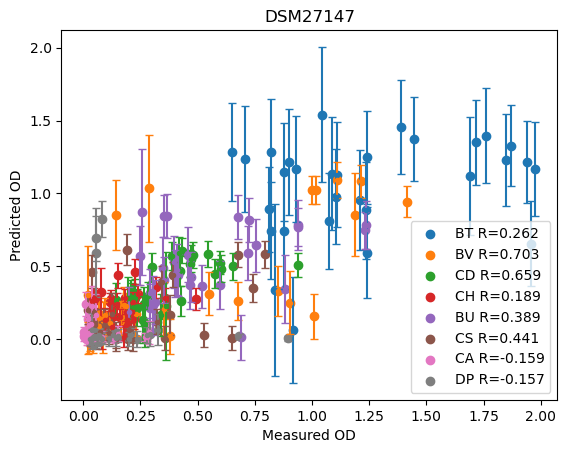

In [4]:
# run kfold for each file 
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=10, shuffle=True, random_state=21)

    # keep track of all predictions
    all_exp_names = []
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    for train_index, test_index in kf.split(dfs):
        #train_index, test_index = next(iter(kf.split(dfs)))

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = gLV(species, train_df)

        # fit to data 
        model.fit()

        # plot fitness to data
        exp_names, pred_species, true, pred, stdv = predict_df(test_df, species)

        # append predictions 
        all_exp_names = np.append(all_exp_names, exp_names)
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        strain = file.split("_")[1]
        kfold_df = pd.DataFrame()
        kfold_df['Treatments'] = all_exp_names
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_10fold.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"figures/{strain}_10fold.pdf", dpi=300)
    plt.show()

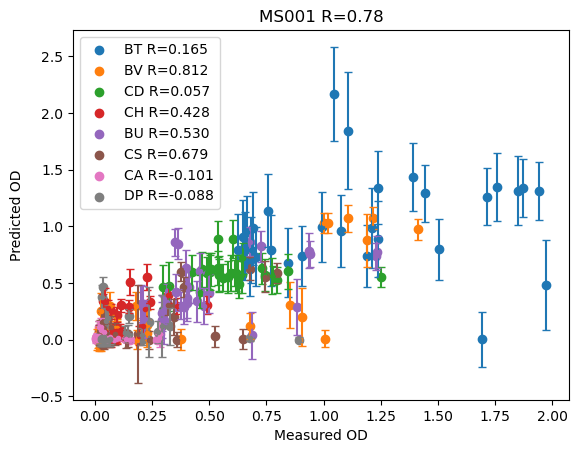

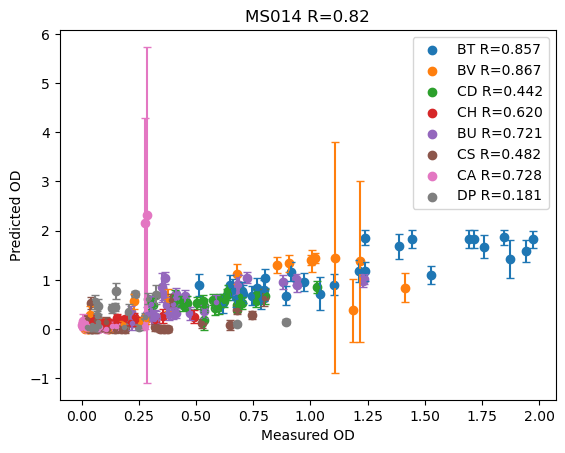

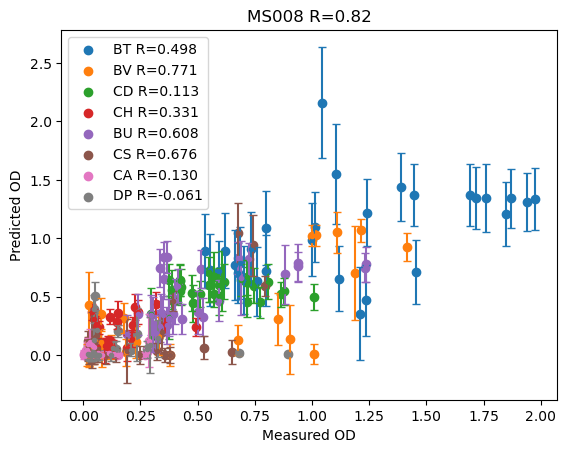

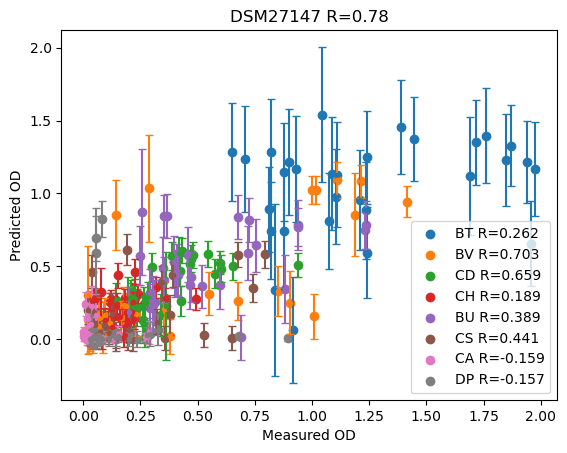

In [8]:
for file in files:
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]
    
    strain = file.split("_")[1]
    kfold_df = pd.read_csv(f"kfold/{strain}_10fold.csv")
        
    all_pred_species = kfold_df['species'].values
    all_true = kfold_df['true'].values 
    all_pred = kfold_df['pred'].values
    all_stdv = kfold_df['stdv'].values
        
    R_overall = linregress(all_true, all_pred).rvalue
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain + " R={:.2f}".format(R_overall))
    plt.savefig(f"figures/{strain}_10fold.pdf", dpi=300)
    plt.show()